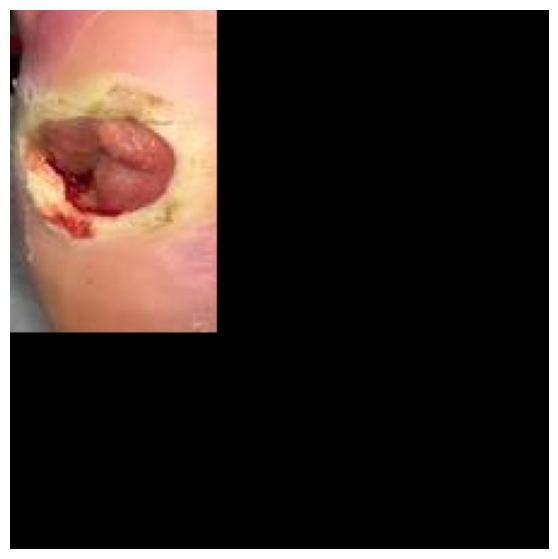

In [26]:
import cv2
from deepskin import wound_segmentation
import matplotlib.pyplot as plt

# load the image in any OpenCV supported fmt
img = cv2.imread('/home/setare/Vision/Hakathon/Diabetic Wound Clustering/Datasets/azh_wound_care_center_dataset_patches/test/images/fe538b56221f0c9413a04b16b527250b_1.png')

# convert the image to RGB fmt for the display
img = img[..., ::-1]

# define the plot figure
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(7, 7))
canvas = ax.imshow(img)
_ = ax.axis('off')

Perform the semantic image segmentation...  [DONE] (7.554 sec)                  


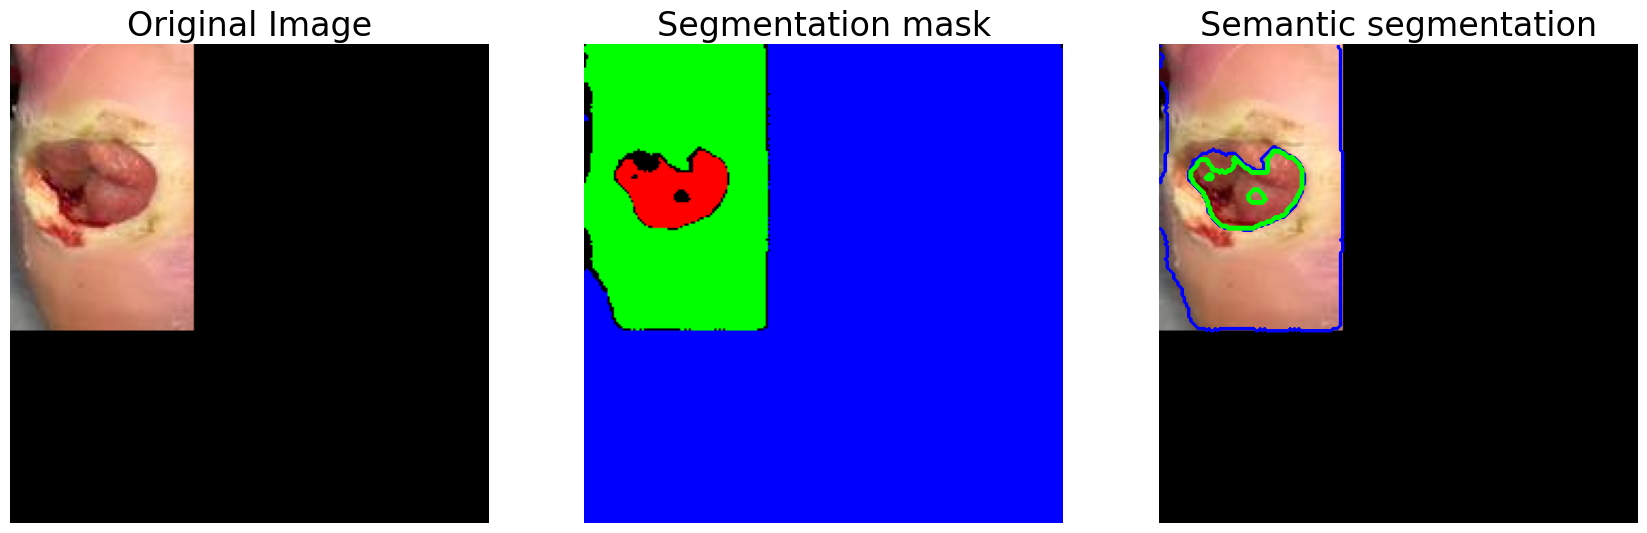

In [27]:
import cv2
from deepskin import wound_segmentation

# get the wound segmentation mask
segmentation = wound_segmentation(
    img=img,
    tol=0.95,
    verbose=True,
)

wound_mask, body_mask, bg_mask = cv2.split(segmentation)

# display the results
fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(21, 7))
ax1.imshow(img)
ax1.set_title('Original Image', fontsize=24)
_ = ax1.axis('off')
ax2.imshow(segmentation)
ax2.set_title('Segmentation mask', fontsize=24)
_ = ax2.axis('off')
ax3.imshow(img)
ax3.contour(body_mask, colors='blue', linewidths=1)
ax3.contour(wound_mask, colors='lime', linewidths=2)
ax3.set_title('Semantic segmentation', fontsize=24)
_ = ax3.axis('off')

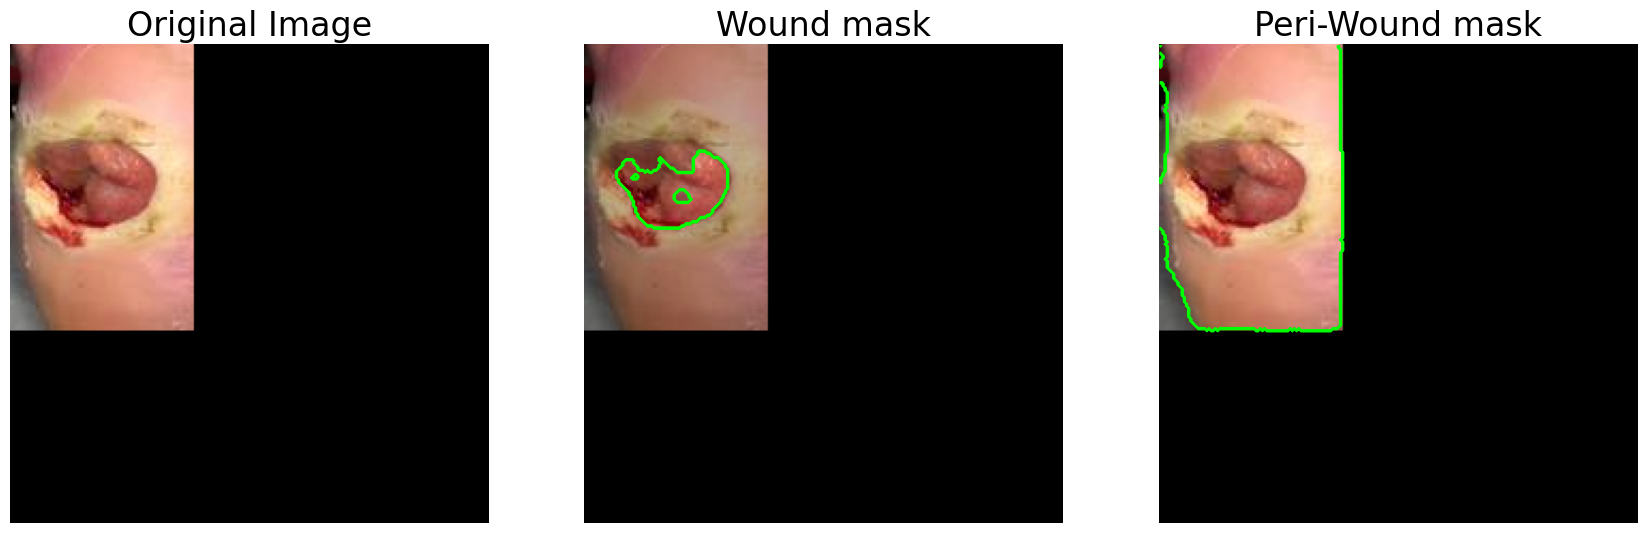

In [28]:
from deepskin.imgproc import imfill
from deepskin.imgproc import get_perilesion_mask

# compute the peri-wound mask
peri_wound_mask = get_perilesion_mask(mask=wound_mask, ksize=(200, 200))
# refine it using the body-mask ROI
peri_wound_mask = cv2.bitwise_and(
    peri_wound_mask,
    peri_wound_mask,
    mask=imfill(body_mask | wound_mask) # correct the body mask
)

fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(21, 7))
ax1.imshow(img)
ax1.set_title('Original Image', fontsize=24)
_ = ax1.axis('off')
wound_masked = cv2.bitwise_and(img, img, mask=wound_mask)
ax2.imshow(wound_masked)
ax2.imshow(img, alpha=0.75)
ax2.contour(wound_mask, colors='lime', linewidths=1)
ax2.set_title('Wound mask', fontsize=24)
_ = ax2.axis('off')
peri_wound_masked = cv2.bitwise_and(img, img, mask=peri_wound_mask)
ax3.imshow(peri_wound_masked)
ax3.imshow(img, alpha=0.75)
ax3.contour(peri_wound_mask, colors='lime', linewidths=1)
ax3.set_title('Peri-Wound mask', fontsize=24)
_ = ax3.axis('off')

Perform the PWAT estimation...  [DONE]  (0.141 sec)                              


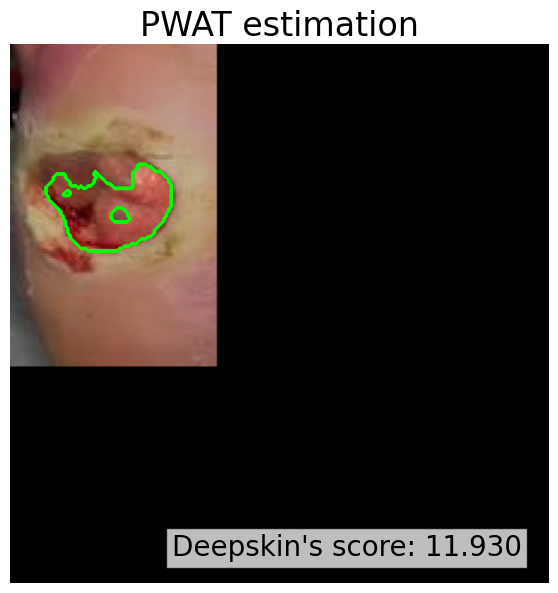

In [29]:
from deepskin import evaluate_PWAT_score

# compute the PWAT score using the regression model
pwat = evaluate_PWAT_score(
    img=img, 
    mask=segmentation, 
    ksize=(200, 200),
    verbose=True
)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(7, 7))
ax.imshow(wound_masked)
ax.imshow(img, alpha=0.75)
ax.contour(wound_mask, colors='lime', linewidths=1)
ax.set_title('PWAT estimation', fontsize=24)
t = ax.text(0.3, 0.05, f"Deepskin's score: {pwat:.3f}",
            transform=ax.transAxes, fontsize=20)
t.set_bbox(dict(facecolor='white', alpha=0.75, edgecolor='k'))
_ = ax.axis('off')